# Python og sannsynlighet - litt mer programmering

<strong>Velkommen!</strong> I dette notatboka skal vi se litt på hvordan vi kan bruke Python for utregninger knyttet til sannsynlighetsteori. Vi tar det som anledning for å se på noen enkle konsepter i programmering.


In [ ]:
import random   #last inn pakke random som har sannsynlighetsfunksjoner  

Vi har sett at vi kan bruke Python for å simulere tilfeldige hendelser som kast av terninger. Desverre er det veldig krevende å gjenta kode ofte hvis vi skal for eksempel kaste mange terninger. 
Men datamaskiner kan programmeres ganske lett å gjennomføre noen kode igjen og igjen. Konsepten heter "løkke" på norsk og vi skal se på noen eksempler først før dere studerer det videre ved hjelp av Jupyter notater. 

## For-løkke

Vi skal se nå på noen konstruksjon som heter <code>for</code>-løkke. Den trekker ting fra en liste og setter dem inn for en variabel. Syntaks er alltid noe som det følgende:

```Python
    for variabel in liste:
        gjør noe
```
Vi ser på et enkelt eksempel:

In [ ]:
#Eksempel 1: for-løkke
for k in [1,2,'nå er det slut']:
    print(k)

In [ ]:
#Eksempel 2: En annen for-løkke

for n in [1,2,3,4,5]:
    print('Hei på deg!')

Det siste eksempel bare gjentar koden i løkken $5$ ganger, men det var ikke viktig hva står i listen (siden vi har ikke brukt den variablen $n$ i løkken. Det fins et enkelt mulighet å lage en liste med $5$ (eller flere) elementer, det er <code>range</code> kommando. 

In [ ]:
#Eksempel 3: Vi bruker range
for n in range(5):
    print('Hei på deg!')

Men hva gjør <code>range</code> egentlig? Den lager en liste med riktig antall av elementer:
<code>range(5) = [0,1,2,3,4]</code> La oss skrive det ut ved bruk av en for-løkke:

In [ ]:
for k in range(5):
    print(k)

Merk: Python begynner å telle fra $0$! 
<code>range</code> kan faktisk mye mer. Se på <code>range(1,10)</code> og på <code>range(1,2,10)</code> og la oss skrive ut hva står i disse listene:  

In [ ]:
print('Nå ser vi på range(1,10)')
for k in range(1,10):
    print(k)
print('og når på range(1,2,10)')
for r in range(1,2,10):
    print(r)

Et mer avansert eksempel som knyttes til sannsynlighet fins under. Les gjennom kode først og prøv å forstå hva skjer i hver linje. Deretter skal vi kjøre koden og se på resultatet.

In [ ]:
#Eksempelprogramm
ant_kast = 1             # Her bestemmer du hvor mange terninger du vil kaste
ant = [0,0,0,0,0,0]      # En variabel som inneholder en liste med verdier

for i in range(ant_kast):                   
    ant[random.randint(1,6) - 1] += 1       #Hvilken variabel i lista skal økes med 1?

### Lage diagram ###
from matplotlib import pyplot
x = [1,2,3,4,5,6]                           # Dette er verdiene på x-aksen, og ant er verdiene på y-aksen
pyplot.bar(x,ant)
pyplot.show()

For løkker tilatter at vi gjentar kode på en effektiv måte. 
Merk: 
1. I eksempelen over har vi brukt range(ant_kast) for å lage listen $[0,1,...,\text{ant_kast}-1]$.     OBS: Python teller fra 0! og 
2. Python gjentar kode i for-løkken som har innrykk. Det er veldig viktig å huske innrykk. 

Vi ser på et eksempel av dette:

In [ ]:
#Se på kode under og avgjør før den kjøres: 
#1. Hvor ofte gjentas for-løkken? Dvs. hva slags liste lager range?
#2. Hva skjer i løkken? Hva skjer etter løkken?
for i in range(2):
    print('jeg er så glad')
print('nå er jeg sur')

3. Vi kan bruke den nye variabelen "variabel" i koden som utføres i løkken 

In [ ]:
for k in range(5):
    print(2*(k+1))

Det fins en forskjell mellom de variabler $n$ og $k$ som vi brukte i siste eksempel. Den forklarer vi i introduksjon til løkker som ligger på Canvas. Se på Jupyter notebook *PY0101No-3-2-Loops (loekker).ipynb* (se Canvas)

#### Oppgave
Lag to nye for-løkker som kaster en terning 10 ganger og skriver ut resultatet.  
Utfordring: La programmet skrive ut også hver gang hvilken kast det viser nå.

In [ ]:
#skriv din kode under og kjør den ved å trykke shift+enter

### while-løkker

Noen ganger vet vi ikke hvor ofte vi ville utføre en løkke på forhand. F.eks. kunne vi være interessert i å kaste en terning så ofte inntil vi får en $5$er.

For disse tilfelle fins en annen løkke vi kan bruke. Den heter <code>while</code>-løkke og kjøres så langt en betingelse er oppfyllt.
Syntaks for den er som følgende

```Python
while vilkår :
      gjør noe 
```
Så den sjekkes hvis betingelsen er sant og så lenge det er gitt, kjøres kode i løkken. Den betingelsen må være et utrykk Python kan finne ut om det er sant (True) eller ikke sant (False). Mer om disse utrykk og hvordan man lager dem fins i Jupyter notat *PY0101No-3-1-Vilkår*
La oss se det i eksempel for terningskast.

In [ ]:
terning = 0
antall_kast = 0
while terning !=5:
    terning=random.randint(1,6)
    antall_kast +=1
print('Vi måtte kaste', antall_kast, 'ganger for å få en 5er')

#### Tull med while løkker

Man må passe litt på med while-løkker siden de bare avsluttet hvis betingelsen som evalueres i begynnelse er ikke lengre sant. Se på følgendes eksemple og avgjør hva ville skje:

In [ ]:
while True:
    print('ahhhhhh, løkken slutter aldri!!!!')

Igjen mer informasjon om while-løkker fins i *PY0101No-3-2-Loops (loekker).ipynb*.

## Vilkår If - else - elseif

Ofte i programmering vil vi gjerne styre programmen slik at noe skjer hvis noen vilkår er oppfyllt. 
Vi skal demonstrere det igjen med et eksempel fra sannsynlighet. Vi skal lage et sjansespill som vises i bildet:
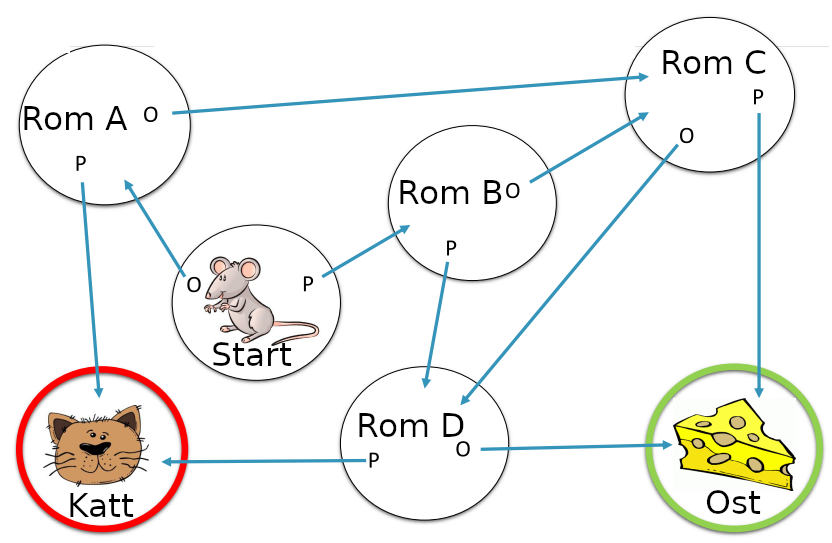
Musen må komme seg frem fra start til ost uten at den treffer katten. Som vi ser har musen hver gang to muligheter å gå et sted ($O$ eller $P$) vi skal lage en program som velger tilfeldig mellom $O$ og $P$ og simulerer spillet.

For dette trenger vi et nytt verktøy, <code>if-vilkår</code>.

Syntaks for et slik vilkår er 
```Python
   if vilkår som sjekkes :
        noen som skal skje
```

In [ ]:
# Vilkår i katt-mus eksempel
print('Du står på start av katt-mus spillet!')

muligheter = ['O','P']
valg = random.choice(muligheter)

if valg =='O':
    print('Du tar utgang O og står nå i Rom A')
if valg =='P':
    print('Du tar utgang P og står nå i Rom B')

Vi kan bruke <code>if-vilkår</code> for å velge programdelen som skal utføres (man kaller det også forgrening eller "branching" på engelsk). Det var litt tungvint i siste eksempel å skrive 
```Python
if valg == 'O'
``` 
og deretter 
```Python
if valg == 'P'
```
siden det fins only to muligheter. Det fins en enklere mulighet å bruke forgrene har. Hvis vi har bare to muligheter kan vi bruke <code>else</code> kommando. Vi viser det nå og programmerer det siste eksempel igjen ved bruk av <code>if-else</code>:

In [ ]:
# Vilkår i katt-mus eksempel (forbedret!)
print('Du står på start av katt-mus spillet!')

muligheter = ['O','P']
valg = random.choice(muligheter)

if valg =='O':
    print('Du tar utgang O og står nå i Rom A')
else:                                          #Husk ":" etter else! 
    print('Du tar utgang P og står nå i Rom B')

Selvfølgelig kan vi fortsette å lage <code>if-vilkår</code> for å komme oss frem i katt-mus-spillet. For eksempel hvis vi ser igjen på første valg i vilkåren kan vi fortsette slik:

In [ ]:
# Vilkår i katt-mus eksempel (nå med to steg...)
print('Du står på start av katt-mus spillet!')

muligheter = ['O','P']
valg = random.choice(muligheter)

if valg =='O':
    print('Du tar utgang O og står nå i Rom A')
    # Nå vil vi fortsette med valgene og gå ut fra rom A
    valg = random.choice(muligheter) #Velg på nytt!
    if valg == 'O':
        print('Du tar utgang O igjen og står i Rom C')
    else:
        print('Du tar utgang P og møter katten, GAME OVER!')
else:
    print('Du tar utgang P og står nå i Rom B')

Merk: Det kommer an på innrykk av if-vilkår og løkker hva skjer i hvilken rekkenfølge!

#### Oppgave
Bruk flere <code>if-else vilkår</code> for å lage programkode som simulerer hele katt-mus-spillet. 

Tipps: 
1. Se på bildet og bruk romnavnene for å ha oversikt over hvor du er nå og hva som skjer med et valg.
2. Bruk programkode over for å komme i gang

Merk: Når musen møter katten eller ost er spillet ferdig og vi trenger ikke mer vilkår.

In [ ]:
#Skriv inn kode ditt under, husk å trykke SHIFT+ENTER for å kjøre koden

Mye mer informasjon om vilkår og forgrening fins i Jupyter notat *PY0101No-3-1-Vilkår* (på Canvas). Her skal vi bare vise på den siste mulighet å utvide <code>if-else-vilkår</code>, og dette er hva man kaller <code>elif-vilkår</code> (elif er forkortet for else + if). For eksempel hvis vi kaster en terning og vil at Python skriver ut ord for hver tall av terningskast så kan vi gjøre det som følgende:  

In [ ]:
#Valg av flere muligheter ved bruk av if-elif-else
kast = random.randint(1,6)
if kast == 1:
    print('en')
elif kast == 2:
    print('to')
elif kast == 3:
    print('tre')
elif kast == 4:
    print('fire')
elif kast == 5:
    print('fem')
else :
    print('seks')    

**Spørsmål**: Hva skjer hvis vi bytter ut <code>else</code> med <code>elif kast == 6:</code>?